In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

c:\programdata\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\programdata\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = sm.datasets.fair.load_pandas().data

In [12]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
def affair_check(x):
    
    
    if x!= 0:
        return 1
    if x == 0:
        return 0

df['Had_Affair'] = df['affairs'].apply(affair_check)

In [15]:
df.groupby(df['Had_Affair']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


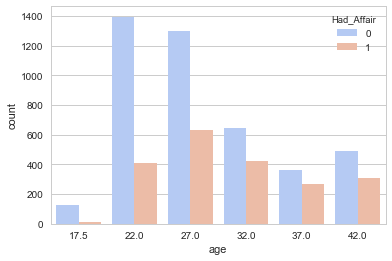

In [19]:
sns.countplot(x='age', hue = 'Had_Affair', data = df, palette = 'coolwarm')

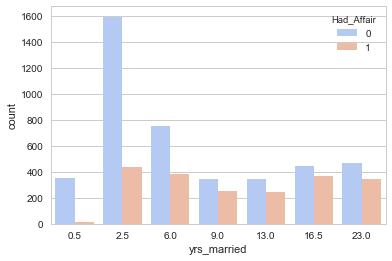

In [20]:
sns.countplot(x='yrs_married', hue = 'Had_Affair', data = df, palette = 'coolwarm')

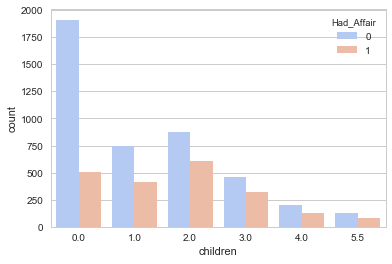

In [21]:
sns.countplot(x='children', hue = 'Had_Affair', data = df, palette = 'coolwarm')

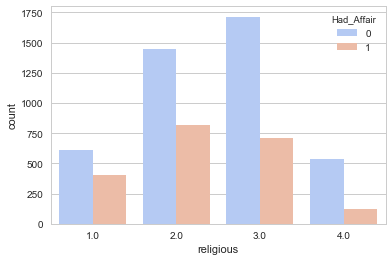

In [22]:
sns.countplot(x='religious', hue = 'Had_Affair', data = df, palette = 'coolwarm')

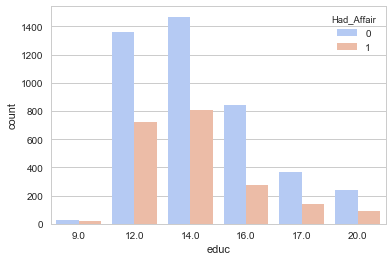

In [23]:
sns.countplot(x='educ', hue = 'Had_Affair', data = df, palette = 'coolwarm')

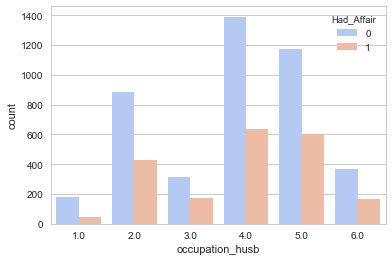

In [25]:
sns.countplot(x='occupation_husb', hue = 'Had_Affair', data = df, palette = 'coolwarm')

In [28]:
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [31]:
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [35]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair' ], axis = 1)

In [36]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [38]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis = 1)

In [40]:
X = pd.concat([X, dummies], axis = 1)

In [41]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [42]:
Y = df['Had_Affair']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [46]:
X= X.drop(['occ1', 'hocc1', 'affairs'], axis = 1)
X= X.drop('affairs', axis = 1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [107]:
X1= X.drop(['educ', 'children', 'age'], axis = 1)

In [47]:
Y = np.ravel(Y)

In [51]:
log_model = LogisticRegression()
log_model.fit(X, Y)
log_model.score(X, Y)

0.72588752748978946

In [52]:
Y.mean()

0.32249450204209867

In [72]:
coef1 = np.transpose(log_model.coef_)
coef1

array([[-0.69788542],
       [-0.05634703],
       [ 0.10390557],
       [ 0.01817278],
       [-0.36849605],
       [ 0.00878983],
       [ 0.29797858],
       [ 0.60791607],
       [ 0.34603777],
       [ 0.94236514],
       [ 0.90532443],
       [ 0.21843321],
       [ 0.32431186],
       [ 0.18814483],
       [ 0.21158402],
       [ 0.21442707]])

In [75]:
coeff_df = pd.DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [76]:
coeff_df

,0,1
0,rate_marriage,[-0.697885418003]
1,age,[-0.0563470329082]
2,yrs_married,[0.10390556524]
3,children,[0.0181727821051]
4,religious,[-0.36849604874]
5,educ,[0.00878983466596]
6,occ2,[0.297978583959]
7,occ3,[0.607916072396]
8,occ4,[0.346037767295]
9,occ5,[0.942365139632]


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y)

In [109]:
log_model2 = LogisticRegression()
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
class_predict = log_model2.predict(X_test)

In [106]:
len(Y_test)

637

In [111]:
metrics.accuracy_score(Y_test, class_predict)

0.72613065326633164

In [112]:
from sklearn.metrics import confusion_matrix as confusion_matrix
confusion_matrix(Y_test, class_predict)

array([[987,  95],
       [341, 169]])